In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
import torch
from torch.autograd import Variable, grad
from torch.nn.functional import binary_cross_entropy_with_logits as bce

## Learn to Generate full gaussian distribution of n outputs from n uniform distributed inputs. 

This is NOT learning to sample from a gaussian. It's learning a mapping from $\mathbf{n}$ uniformly distributed inputs to $\mathbf{n}$ gaussian distributed outputs.

Scroll to bottom for result.

PyTorch implementation help from David Lopez-Paz.

In [2]:
real_data = torch.Tensor(20000, 1)
real_data.normal_(0,1)


-0.4324
 1.0481
 0.4481
   ⋮    
 0.1892
 0.7118
-0.6208
[torch.FloatTensor of size 20000x1]

(array([    9.,   115.,   751.,  2751.,  5339.,  5994.,  3592.,  1177.,
          248.,    24.]),
 array([-4.03541708, -3.25215588, -2.46889467, -1.68563347, -0.90237226,
        -0.11911106,  0.66415014,  1.44741135,  2.23067255,  3.01393375,
         3.79719496]),
 <a list of 10 Patch objects>)

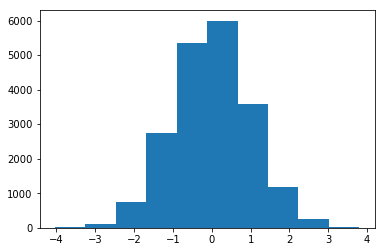

In [3]:
plt.hist(real_data.numpy())

In [4]:
class Perceptron(torch.nn.Module):
    def __init__(self, sizes, final=None):
        super(Perceptron, self).__init__()
        layers = []
        for i in range(len(sizes) - 1):
            layers.append(torch.nn.Linear(sizes[i], sizes[i + 1]))
            if i != (len(sizes) - 2):
                layers.append(torch.nn.ReLU())
        if final is not None:
            layers.append(final())
        self.net = torch.nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


def plot(x, y):
    real = x.cpu().data.numpy()
    print real.shape
    fake = y.cpu().data.numpy()
    print fake.shape
    #lims = (x.data.min() - 0.1, x.data.max() + 0.1)
    xlim = (-3.5, 3.5)
    plt.figure(figsize=(2, 2))
    plt.hist(real, label='real', bins=np.arange(-3.5, 3.5, 0.1))
    plt.hist(fake, alpha=0.25, label='fake', bins=np.arange(-3.5, 3.5, 0.1))
    plt.axis('on')
    plt.gca().axes.get_xaxis().set_visible(True)
    plt.gca().axes.get_yaxis().set_visible(True)
    plt.xlim(xlim)
    plt.tight_layout(0, 0, 0)
    plt.show()


def means_gaussian(std = 1, n_samples = 1000):
    m = torch.Tensor(n_samples, 1)
    return (m.normal_(0,std))


def sample_real(n, shape, std=1.):
    m = means_gaussian(std, n)
    return Variable(m, requires_grad=True)


def sample_noise(bs, d):
    z = torch.rand(bs, d)
    return Variable(z, requires_grad=True)



In [5]:
n_iterations = 1500
n_latent = 1
n_layers = 3
n_hidden = 512
bs = 256
shape = 'gauss'
lamD = 10.
extraD = 10
wgan = False
verbose = True
v_freq = 40
n_samples = 2000

netD = Perceptron([1] + [n_hidden] * n_layers + [1])
print netD
netG = Perceptron([n_latent] + [n_hidden] * n_layers + [1])
print netG
optD = torch.optim.Adam(netD.parameters())
optG = torch.optim.Adam(netG.parameters())

p_real = sample_real(n_samples, shape)
p_nois = sample_noise(n_samples, n_latent)
#print p_nois.data.numpy().shape
#print p_real.data.numpy().shape

Perceptron (
  (net): Sequential (
    (0): Linear (1 -> 512)
    (1): ReLU ()
    (2): Linear (512 -> 512)
    (3): ReLU ()
    (4): Linear (512 -> 512)
    (5): ReLU ()
    (6): Linear (512 -> 1)
  )
)
Perceptron (
  (net): Sequential (
    (0): Linear (1 -> 512)
    (1): ReLU ()
    (2): Linear (512 -> 512)
    (3): ReLU ()
    (4): Linear (512 -> 512)
    (5): ReLU ()
    (6): Linear (512 -> 1)
  )
)


In [6]:
def objective_wgan(fakeD, realD):
    return fakeD.mean() - realD.mean()


def objective_gan(fakeD, realD):
    labD = torch.cat((torch.ones(fake.size(0), 1) - 1e-3,
                      torch.zeros(real.size(0), 1) + 1e-3))
    return bce(torch.cat((fakeD, realD)), Variable(labD))

Epoch #1: Generative Loss: -0.260052442551, Discriminative Loss: 0.298486590385
(2000, 1)
(2000, 1)


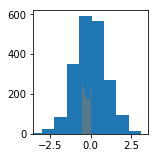

Epoch #41: Generative Loss: -0.503390610218, Discriminative Loss: 0.524217307568
(2000, 1)
(2000, 1)


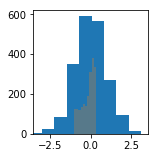

Epoch #81: Generative Loss: -0.568497180939, Discriminative Loss: 0.58541983366
(2000, 1)
(2000, 1)


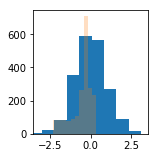

Epoch #121: Generative Loss: -0.690188407898, Discriminative Loss: 0.687747657299
(2000, 1)
(2000, 1)


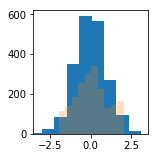

Epoch #161: Generative Loss: -0.670769393444, Discriminative Loss: 0.676881194115
(2000, 1)
(2000, 1)


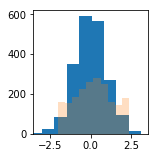

Epoch #201: Generative Loss: -0.675805985928, Discriminative Loss: 0.672660887241
(2000, 1)
(2000, 1)


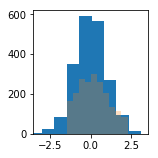

Epoch #241: Generative Loss: -0.663189411163, Discriminative Loss: 0.678857922554
(2000, 1)
(2000, 1)


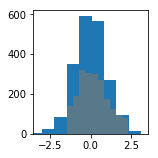

Epoch #281: Generative Loss: -0.67523676157, Discriminative Loss: 0.678476154804
(2000, 1)
(2000, 1)


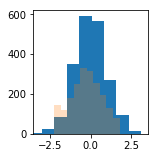

Epoch #321: Generative Loss: -0.678920686245, Discriminative Loss: 0.682760238647
(2000, 1)
(2000, 1)


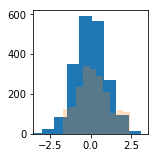

Epoch #361: Generative Loss: -0.673099756241, Discriminative Loss: 0.687670528889
(2000, 1)
(2000, 1)


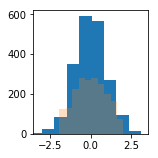

Epoch #401: Generative Loss: -0.681776583195, Discriminative Loss: 0.677998781204
(2000, 1)
(2000, 1)


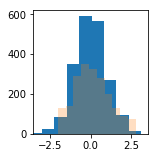

Epoch #441: Generative Loss: -0.679240882397, Discriminative Loss: 0.685328900814
(2000, 1)
(2000, 1)


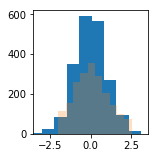

Epoch #481: Generative Loss: -0.682001888752, Discriminative Loss: 0.670457839966
(2000, 1)
(2000, 1)


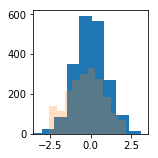

Epoch #521: Generative Loss: -0.68410128355, Discriminative Loss: 0.68581956625
(2000, 1)
(2000, 1)


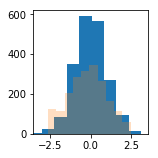

Epoch #561: Generative Loss: -0.689300119877, Discriminative Loss: 0.689657390118
(2000, 1)
(2000, 1)


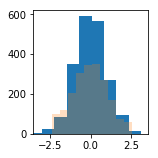

Epoch #601: Generative Loss: -0.689965426922, Discriminative Loss: 0.690603077412
(2000, 1)
(2000, 1)


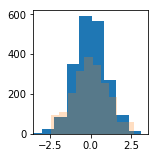

Epoch #641: Generative Loss: -0.69189363718, Discriminative Loss: 0.685658454895
(2000, 1)
(2000, 1)


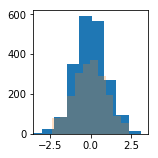

Epoch #681: Generative Loss: -0.68815600872, Discriminative Loss: 0.688290774822
(2000, 1)
(2000, 1)


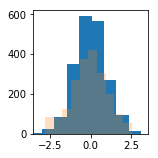

Epoch #721: Generative Loss: -0.691692769527, Discriminative Loss: 0.698329806328
(2000, 1)
(2000, 1)


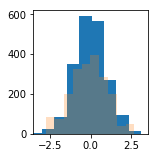

Epoch #761: Generative Loss: -0.689468741417, Discriminative Loss: 0.687273263931
(2000, 1)
(2000, 1)


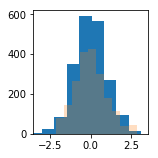

Epoch #801: Generative Loss: -0.689407348633, Discriminative Loss: 0.683689415455
(2000, 1)
(2000, 1)


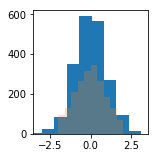

Epoch #841: Generative Loss: -0.693039536476, Discriminative Loss: 0.693459510803
(2000, 1)
(2000, 1)


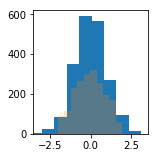

Epoch #881: Generative Loss: -0.691994190216, Discriminative Loss: 0.687223851681
(2000, 1)
(2000, 1)


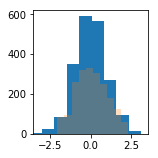

Epoch #921: Generative Loss: -0.687787175179, Discriminative Loss: 0.690337777138
(2000, 1)
(2000, 1)


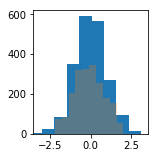

Epoch #961: Generative Loss: -0.687028586864, Discriminative Loss: 0.689517438412
(2000, 1)
(2000, 1)


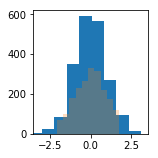

Epoch #1001: Generative Loss: -0.686984121799, Discriminative Loss: 0.685170948505
(2000, 1)
(2000, 1)


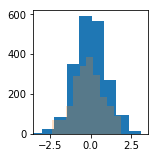

Epoch #1041: Generative Loss: -0.684000968933, Discriminative Loss: 0.68613409996
(2000, 1)
(2000, 1)


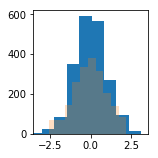

Epoch #1081: Generative Loss: -0.685297012329, Discriminative Loss: 0.691672861576
(2000, 1)
(2000, 1)


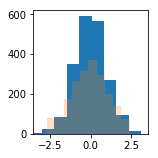

Epoch #1121: Generative Loss: -0.687580227852, Discriminative Loss: 0.682962536812
(2000, 1)
(2000, 1)


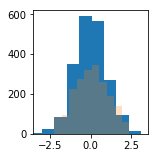

Epoch #1161: Generative Loss: -0.689613640308, Discriminative Loss: 0.691419482231
(2000, 1)
(2000, 1)


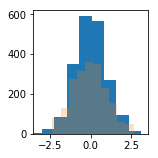

Epoch #1201: Generative Loss: -0.694267749786, Discriminative Loss: 0.695186376572
(2000, 1)
(2000, 1)


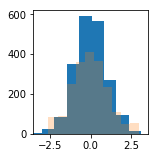

Epoch #1241: Generative Loss: -0.68086785078, Discriminative Loss: 0.682865679264
(2000, 1)
(2000, 1)


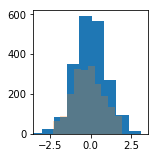

Epoch #1281: Generative Loss: -0.688780248165, Discriminative Loss: 0.684940516949
(2000, 1)
(2000, 1)


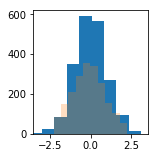

Epoch #1321: Generative Loss: -0.690812528133, Discriminative Loss: 0.683972537518
(2000, 1)
(2000, 1)


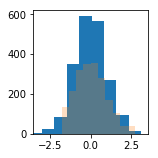

Epoch #1361: Generative Loss: -0.687510192394, Discriminative Loss: 0.681487083435
(2000, 1)
(2000, 1)


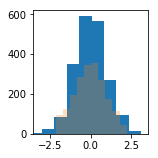

Epoch #1401: Generative Loss: -0.682307958603, Discriminative Loss: 0.678197264671
(2000, 1)
(2000, 1)


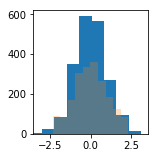

Epoch #1441: Generative Loss: -0.6788610816, Discriminative Loss: 0.687417030334
(2000, 1)
(2000, 1)


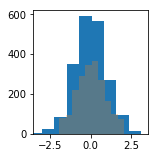

Epoch #1481: Generative Loss: -0.684826016426, Discriminative Loss: 0.687934756279
(2000, 1)
(2000, 1)


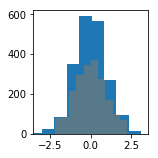

In [7]:

objective = objective_wgan if wgan else objective_gan

iter_range = range(n_iterations)

#print out time information if verbose is True
#if verbose:
#    iter_range = tqdm(iter_range)


for iteration in iter_range:
    for extra in range(extraD):
        
        # create a sample of real data in the shape of interest
        real = sample_real(bs, shape)
        #print "Real size:", real.data.numpy().shape
        fake = netG(sample_noise(bs, n_latent))
        #print fake.data.numpy().shape
        data = torch.cat((fake, real), 0)

        optD.zero_grad()
        lossD = objective(netD(real), netD(fake))
        gradD = grad(lossD * bs, fake, create_graph=True)[0]
        reguD = gradD.norm(2, 1).clamp(1).mean()
        (lossD + lamD * reguD).backward()
        optD.step()

    real = sample_real(bs, shape)
    fake = netG(sample_noise(bs, n_latent))

    optG.zero_grad()
    lossG = - objective(netD(real), netD(fake))
    (lossG).backward()
    optG.step()

    if (iteration % v_freq) == 0:
        #print "Iteration: " iteration, "Discriminative Loss: " lossD.data[0], 
              #"Generative Loss: " lossG.data[0], reguD.data[0]
        print("Epoch #{}: Generative Loss: {}, Discriminative Loss: {}".format(iteration + 1, lossG.data[0], lossD.data[0]))
        plot(p_real, netG(p_nois))



#Gloss, Dloss = train(netG, netD, shape = shape, wgan=False, verbose = False)



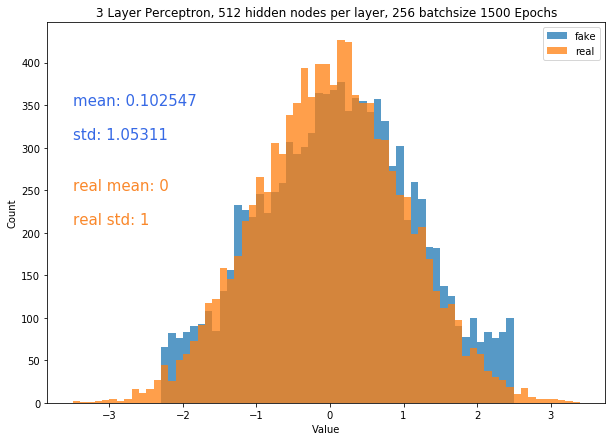

In [19]:
outputs = netG.forward(Variable(torch.rand(10000,1)))
fig = plt.figure(figsize=(10,7))
plt.hist(outputs.data.numpy(), alpha = 0.75, label = "fake", bins=np.arange(-3.5, 3.5, 0.1))
plt.hist(sample_real(10000,shape).data.numpy(), alpha = 0.75, label = "real", bins=np.arange(-3.5, 3.5, 0.1))
plt.xlabel("Value")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.title( str(n_layers) + " Layer Perceptron, " + str(n_hidden) + 
          " hidden nodes per layer, " + str(bs) + " batchsize " +   str(n_iterations) + " Epochs")
plt.text(-3.5, 350, 'mean: ' + str(outputs.data.numpy().mean()), fontsize = 15, alpha = 0.8, color = 'xkcd:blue')
plt.text(-3.5, 310, 'std: ' + str(outputs.data.numpy().std()), fontsize = 15, alpha = 0.8, color = 'xkcd:blue')
plt.text(-3.5, 250, 'real mean: 0', fontsize = 15, alpha = 0.85, color = 'xkcd:orange')
plt.text(-3.5, 210, 'real std: 1', fontsize = 15, alpha = 0.85, color = 'xkcd:orange')
plt.savefig("plots/GeneratedNormalSample_LinearReluPerceptronGAN" + str(n_layers) + "Layers_" + str(n_hidden) + 
            "hiddenPerLayer_size" + str(bs) + "Batch_" + str(n_iterations) + "Epochs")

(1000, 1)
(1000, 1)


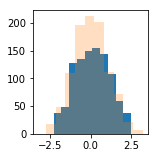

In [9]:
plot(outputs, sample_real(1000,shape))

In [14]:
outputs.data.numpy().mean()

0.12060061